##Projet Heart Disease

> Projet "Predict Heart Disease" fait par Roman COTTINET, Bryan JALIOT et Hajar RAHMOUNE



In [0]:
import os
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
os.chdir("/content/drive/My Drive/Projet_Machine_Learning/Dataset_heart_disease")
!ls 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
framingham.csv	model.pkl  tree.dot


In [0]:
# imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.externals import joblib

#Import du dataset

Dataset présent sur Kaggle, qui regroupe plusieurs données de personnes de la ville de Framingham, au Massachussets, Etats-Unis. Le dataset comporte plus de 4000 observations et possède 15 features.

https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset


In [0]:
df_heartdisease = pd.read_csv("framingham.csv")

df_heartdisease


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [0]:
df_heartdisease.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

Nombre de personnes qui ont eu un problème de coeur ou non



In [0]:
df_heartdisease['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

Nombre de valeur null dans chaque colonne

In [0]:
df_heartdisease.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Suppression des observations contenant des valeurs null pour une meilleure analyse et une meilleure prédiction

In [0]:
df_heartdisease.dropna(axis=0,inplace=True)
df_heartdisease.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [0]:
df_heartdisease

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


##Visualisation

Différentes visualisation entre les différentes features pour analyser la corrélation entre ces features et la feature cible "TenYearCHD"

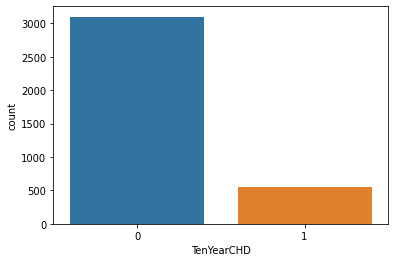

In [0]:
sn.countplot(x='TenYearCHD',data=df_heartdisease)

On peut voir ici qu'il y a une différence importante entre le nombre de cas sain et cas à risques. 3596 cas sains et 644 cas malades

In [0]:
# make a function to plot survival against passenger attribute
def CHD_rate(column,t):
    df=pd.DataFrame()
    df['total']=df_heartdisease.groupby(column).size()
    df['TenYearCHD'] = df_heartdisease.groupby(column).sum()['TenYearCHD']
    df['percentage'] = round(df['TenYearCHD']/df['total']*100,2)
    print(df)

    df['TenYearCHD'].plot(kind=t)
    df['total'].plot(kind=t,alpha=0.5,title="Risks of Heart Disease per "+str(column))
    plt.show()

           total  TenYearCHD  percentage
education                               
1.0         1526         291       19.07
2.0         1101         131       11.90
3.0          608          75       12.34
4.0          423          60       14.18


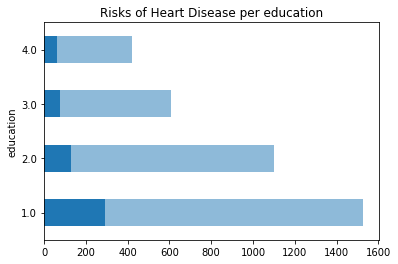

In [0]:
CHD_rate("education", "barh")

               total  TenYearCHD  percentage
currentSmoker                               
0               1869         272       14.55
1               1789         285       15.93


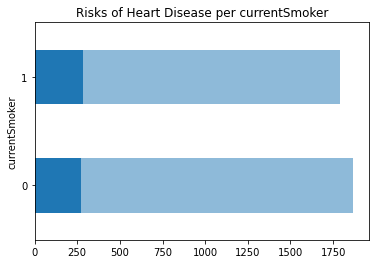

In [0]:
CHD_rate("currentSmoker", "barh")

                 total  TenYearCHD  percentage
prevalentStroke                               
0                 3637         549       15.09
1                   21           8       38.10


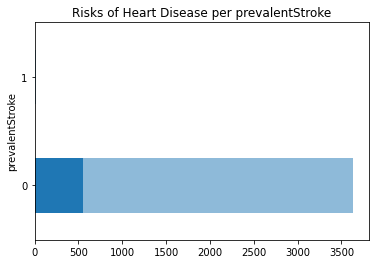

In [0]:
CHD_rate("prevalentStroke", "barh")

              total  TenYearCHD  percentage
prevalentHyp                               
0              2518         273       10.84
1              1140         284       24.91


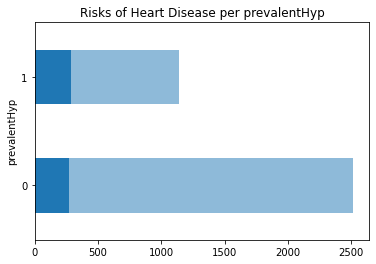

In [0]:
CHD_rate("prevalentHyp", "barh")

          total  TenYearCHD  percentage
diabetes                               
0          3559         522       14.67
1            99          35       35.35


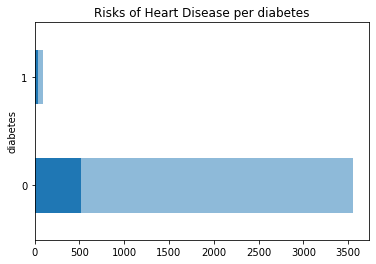

In [0]:
CHD_rate("diabetes", "barh")

On retire la colonne de la feature à prédire

In [0]:
df_train = df_heartdisease.drop(['TenYearCHD'], axis=1)
df_train

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0


##Feature Selection


Algorithme permettant de trouver les features les plus pertinentes.

In [0]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df_train, df_heartdisease['TenYearCHD'], test_size=0.2, random_state=1)

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# find best scored 6 features
select_feature = SelectKBest(chi2, k=10).fit(X_train, y_train)

dfscores = pd.DataFrame(select_feature.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
top_featureScores = featureScores.nlargest(10,'Score')
print(top_featureScores)

           Specs       Score
10         sysBP  499.270421
14       glucose  247.425335
1            age  245.741221
9        totChol  189.309828
4     cigsPerDay  111.840695
11         diaBP  107.357179
7   prevalentHyp   54.706644
5         BPMeds   23.316647
8       diabetes   22.461132
0           male   13.535087


On récupère les features les plus intéressantes pour notre prédiction.

In [0]:
predictors = ["male", "age", "cigsPerDay", 'BPMeds' ,'prevalentHyp','diabetes','totChol', "sysBP", "diaBP", "glucose"]  
df_train2 = df_train[predictors]
df_train2

,male,age,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,glucose
0,1,39,0.0,0.0,0,0,195.0,106.0,70.0,77.0
1,0,46,0.0,0.0,0,0,250.0,121.0,81.0,76.0
2,1,48,20.0,0.0,0,0,245.0,127.5,80.0,70.0
3,0,61,30.0,0.0,1,0,225.0,150.0,95.0,103.0
4,0,46,23.0,0.0,0,0,285.0,130.0,84.0,85.0
...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,0.0,1,0,313.0,179.0,92.0,86.0
4234,1,51,43.0,0.0,0,0,207.0,126.5,80.0,68.0
4237,0,52,0.0,0.0,0,0,269.0,133.5,83.0,107.0
4238,1,40,0.0,0.0,1,0,185.0,141.0,98.0,72.0


##Split Data


Split du dataset en train dataset qui correspond à 70% du dataset initial et en test dataset qui représente le reste.

In [0]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df_train2, df_heartdisease['TenYearCHD'], test_size=0.2, random_state=5)

X_train.head()

,male,age,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,glucose
2661,0,65,0.0,0.0,0,0,344.0,120.0,75.0,98.0
3284,0,39,10.0,0.0,0,0,194.0,112.5,77.5,84.0
3499,0,55,0.0,0.0,0,0,235.0,123.0,81.0,78.0
2574,1,49,0.0,0.0,1,0,304.0,147.0,102.0,77.0
2716,1,62,0.0,0.0,1,0,240.0,152.0,95.0,70.0


##Random Forest


In [0]:
from sklearn.ensemble import RandomForestClassifier

# your code here
clf_rf = RandomForestClassifier(random_state=1, n_estimators=40, min_samples_leaf=3, min_samples_split=2)  # by default, 10 trees are used
clf_rf.fit(X_train, y_train)

train_score = clf_rf.score(X_train, y_train)
test_score = clf_rf.score(X_test, y_test)



from sklearn.model_selection import cross_val_score
scores_rf = cross_val_score(clf_rf, df_train2, df_heartdisease['TenYearCHD'], scoring='accuracy', cv=5)
# your code here
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)
# Cross validation

print('cross validation accuracy =',  scores_rf.mean())



train accuracy = 0.9104579630895421
test accuracy = 0.8565573770491803
cross validation accuracy = 0.848278426887339


Text(0.5, 0, 'Number of Trees')

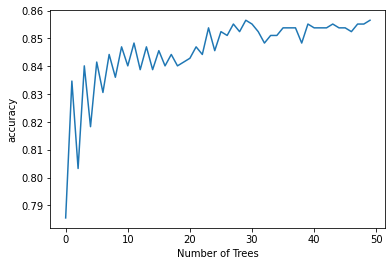

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

trees=range(50)
accuracy=np.zeros(50)
for idx in range(len(trees)):
    clf_rf=RandomForestClassifier(random_state=1, n_estimators=idx + 1)
    clf_rf.fit(X_train,y_train)
    accuracy[idx]=clf_rf.score(X_test, y_test)  

plt.plot(trees, accuracy)
plt.ylabel('accuracy')
plt.xlabel('Number of Trees')

Utilisation de l'algorithme GridSearch pour trouver le meilleur paramétrage pour le modèle Random Forest.

In [0]:
from sklearn.model_selection import GridSearchCV
# your code here
params = {'min_samples_leaf':list(range(1,5)),'min_samples_split':list(range(2,10,2)),
          'n_estimators':list(range(10,50,10))}
clf_rf=RandomForestClassifier(random_state=1)
clf_gs=GridSearchCV(clf_rf, params, scoring = 'accuracy',cv=5)
clf_gs.fit(df_train2, df_heartdisease['TenYearCHD'])

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [0]:
best_score = clf_gs.best_score_

print('best score', best_score)

best score 0.84964716347843


In [0]:
best_param = clf_gs.best_params_

print('best param', best_param)

best param {'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 30}


##Decision Tree

Utilisation du modèle décision Tree. Un overfitting est constaté avec une précision du test dataset de 73%. Prédiction faiblement efficace.

In [0]:
from sklearn.tree import DecisionTreeClassifier
# your code here
clf_dt = DecisionTreeClassifier(random_state=1)

clf_dt.fit(X_train, y_train)

train_score = clf_dt.score(X_train, y_train)
test_score = clf_dt.score(X_test, y_test)

# your code here
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train accuracy = 1.0
test accuracy = 0.7349726775956285


##Logistic Regression

Utilisation du modèle Logistic Regression qui semble assez performant pour la prédiction avec une précision de 85%.

In [0]:

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

train_score = clf_lr.score(X_train, y_train)
test_score = clf_lr.score(X_test, y_test)


print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

predict_score = clf_lr.predict(X_test)


train accuracy = 0.84688995215311
test accuracy = 0.8592896174863388


###Prédiction

 Simulation de prédiction du risque de problème de coeur pour un patient quelconque.

In [0]:
## Dataset with Features Selection
predictors = ["male", "age", "cigsPerDay", 'BPMeds' ,'prevalentHyp','diabetes','totChol', "sysBP", "diaBP", "glucose"]  
patient_value = [0,	46,	0.0,	0.0,	0,	0,	250.0,	121.0,	81.0,	76.0]
patient_value2 = [1,50,	10.0,	0.0,	1,	0,	313.0,	179.0,	92.0,	86.0]

df_predict = pd.DataFrame(np.array(patient_value2).reshape(1,-1), columns=predictors)
df_predict.head()

,male,age,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,glucose
0,1.0,50.0,10.0,0.0,1.0,0.0,313.0,179.0,92.0,86.0


Prédiction du risque de maladie avec le modèle Random Forest

In [0]:

predict_score = clf_rf.predict(df_predict)
prob_score = clf_rf.predict_proba(df_predict)

print('predict score: ', predict_score)
print('proba score: ', prob_score)

predict score:  [1]
proba score:  [[0.37972274 0.62027726]]


Prédiction du risque de maladie avec le modèle Logistic Régression

In [0]:

predict_score = clf_lr.predict(df_predict)
prob_score = clf_lr.predict_proba(df_predict)

print('predict score: ', predict_score)
print('proba score: ', prob_score)

predict score:  [0]
proba score:  [[0.758144   0.24185595]]


##Matrice de confusion

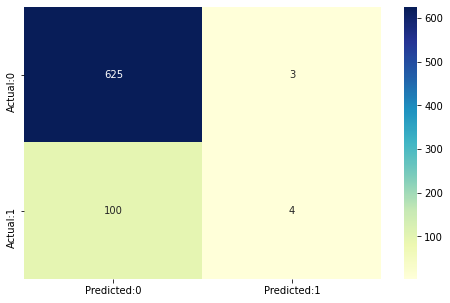

In [0]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predict_score)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

##Model Selection

Comparatif des différents modèles pour trouver le plus efficace.

RF: 0.844845 (0.025653)
LG: 0.841087 (0.024186)
DT: 0.761458 (0.022980)


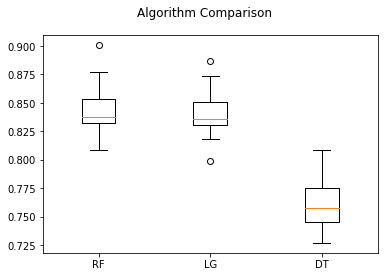

In [0]:
from sklearn import model_selection

models = []
models.append(('RF', RandomForestClassifier()))
models.append(('LG', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=1)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

###Roc Curve

Le ROC Curve permet d'afficher le taux de vrai postitif par rapport aux faux positif. La valeur Area under Curve (AUC) permet de savoir si la performance de vrai positif est importante ou non. Une valeur proche de 1 montre que l'algorithme est efficace.

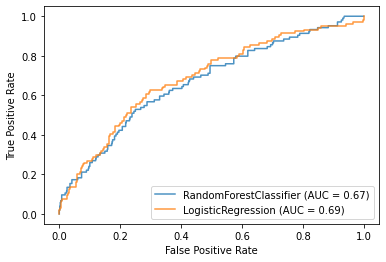

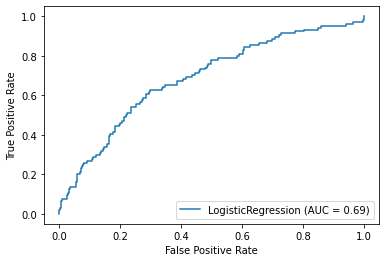

In [0]:
from sklearn.metrics import plot_roc_curve

ax = plt.gca()
rfc_disp = plot_roc_curve(clf_rf, X_test, y_test, ax=ax, alpha=0.8)
lr_disp = plot_roc_curve(clf_lr, X_test, y_test)
lr_disp.plot(ax=ax, alpha=0.8)
plt.show()